In [1]:
# 2.2.1. Tensor /20191226
import torch, numpy as np, matplotlib.pyplot as plt

tensor([[1., 2., 3.],
        [4., 5., 6.]])


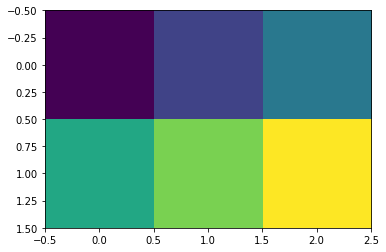

In [2]:
# Creating Tensor / p.71
#--------------------------------------------------

# list로부터 2x3 텐서 생성
x_list = [[1,2,3], [4,5,6]]
x = torch.Tensor(x_list)
print(x)
plt.imshow(x)

tensor([[9., 6., 1.],
        [5., 3., 2.]])


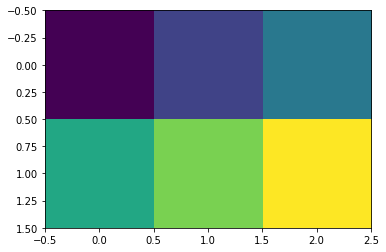

In [3]:
# numpy array로부터 2x3 텐서 생성
x_numpy = np.array([[1, 2, 3],[4, 5, 6]])
x = torch.Tensor(np.array([[9, 6, 1],[5, 3, 2]]))
print(x)
plt.imshow(x_numpy)

In [4]:
# .tolist() ---> list타입으로 형변환
x_back2list =x.tolist()
print(type(x_back2list))

# .numpy() ---> numpy타입으로 형변환
x_back2numpy = x.numpy()
print(type(x_back2numpy))

<class 'list'>
<class 'numpy.ndarray'>


In [5]:
# 기본적으로 텐서 생성시 CPU의 상태 디바이스 정보를 포함한다.
print(x.device)

#cuda를 사용할 수 없을 경우(Colab 외부)설치
device = torch.device("cuda" if torch.cuda.is_available() else "error")
#GPU 사용
x = x.to(device)
print(x.device)

device='cpu'
#CPU 사용
x = x.to(device)
print(x.device)

cpu
cuda:0
cpu


tensor([[0.1591, 0.5897, 0.7913],
        [0.5749, 0.5506, 0.4121]])


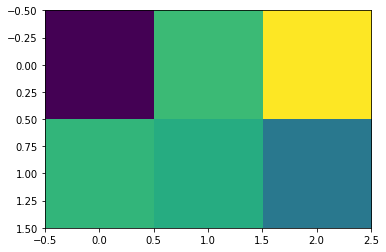

In [6]:
#랜덤 숫자로 구성된 크기가 2x3인 텐서 생성
#0과 1사이의 랜덤한 숫자
twoThree = torch.rand(2,3)
print(twoThree)
plt.imshow(twoThree)

tensor([[6, 6, 5],
        [7, 5, 2]])


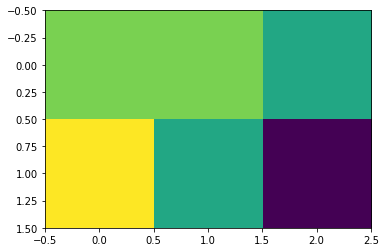

In [7]:
# 0과 8사이의 정수형 랜덤한 숫자
random = torch.randint(low=0, high=8, size=(2,3))
print(random)
plt.imshow(random)

cuda:0
tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


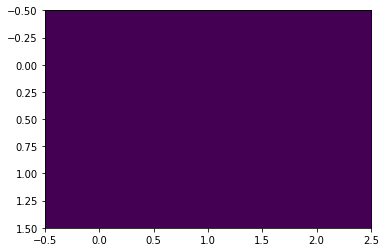

In [8]:
# GPU를 사용하고 크기가 x와 같은 0으로 채워진 텐서 생성
x_zeros = torch.zeros_like(x.cuda())
print(x_zeros.device)
print(x_zeros)
plt.imshow(x_zeros.tolist()) # numpy 형이기 때문에 표시를 위해 list로 형변환

In [9]:
# Types of Tensor / p.73
#--------------------------------------------------

#실수형 텐서
a = torch.FloatTensor(np.array([[3.14, 1.592, 2.3],[4.2, 5.1, 6.6]])) # 실수형이기 때문에 소숫점 표기
print(a.type())
print(a)

#정수형 텐서
b = torch.LongTensor(np.array([[1, 2, 3],[4, 5, 6]]))
print(b.type())
print(b)

#8 bit 정수형 텐기
c = torch.ByteTensor(np.array([True, False, True, True]))
print(c.type())
print(c)


torch.FloatTensor
tensor([[3.1400, 1.5920, 2.3000],
        [4.2000, 5.1000, 6.6000]])
torch.LongTensor
tensor([[1, 2, 3],
        [4, 5, 6]])
torch.ByteTensor
tensor([1, 0, 1, 1], dtype=torch.uint8)


tensor([[[5, 9, 1, 8],
         [5, 7, 7, 7],
         [3, 4, 1, 7]],

        [[2, 0, 6, 3],
         [2, 3, 0, 0],
         [9, 5, 4, 2]]])


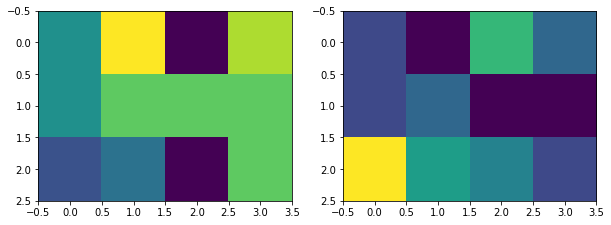

In [10]:
#Manipulation of Tensor / p.74
# 1. Element selection: Slicing
#--------------------------------------------------

torch.manual_seed(777)
threeDList = torch.randint(0, 10, size=(2, 3, 4))
print(threeDList)

#print(len(threeDList[0][0])) # 열 개수
#print(len(threeDList[0])) # 행 개수
#print(len(threeDList)) # 면 개수

d1 = [[0 for x in range(len(threeDList[0][0]))] for y in range(len(threeDList[0]))]
d2 = [[0 for x in range(len(threeDList[0][0]))] for y in range(len(threeDList[0]))]

# 2차원 리스트로 분리
for i in range(len(threeDList)): # 면
  for j in range(len(threeDList[0])): # 행
    for k in range(len(threeDList[0][0])): # 열
      if(i == 0):
        d1[j][k] = threeDList[i][j][k]
      elif(i == 1):
        d2[j][k] = threeDList[i][j][k]
    

d1 = torch.Tensor(d1)
d2 = torch.Tensor(d2)


# 2차원 텐서를 나란히 표시
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1, 2, 1)
plt.imshow(d1)
fig.add_subplot(1, 2, 2)
plt.imshow(d2)
plt.show()


In [11]:
A = torch.rand((2, 3))
print(A)
B = torch.rand((2, 3))
print(B)
AB_cated = torch.cat([A, B], dim=0)
print(AB_cated)

tensor([[0.9411, 0.9180, 0.8952],
        [0.4341, 0.1523, 0.3154]])
tensor([[0.3771, 0.6166, 0.5355],
        [0.9970, 0.3777, 0.9541]])
tensor([[0.9411, 0.9180, 0.8952],
        [0.4341, 0.1523, 0.3154],
        [0.3771, 0.6166, 0.5355],
        [0.9970, 0.3777, 0.9541]])
